<a href="https://colab.research.google.com/github/Xianghe515/COLAB/blob/main/4th_ch11_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import cv2
import os, glob, shutil

In [14]:
# GPU 사용 시 실행할 내용
gpus = tf.config.experimental.list_physical_devices('GPU')  # cuDNN 초기화 문제 있을 때 실행
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)   # GPU 두 개 이상이라면 메모리를 균등하게 사용하도록 조정
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')   # 메모리 설정
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")   # 물리적 GPU와 논리적 GPU 수량 표기
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [24]:
# 데이터셋 준비
input_dir = './data/pets'
glob_dir = input_dir + '/*.jpg'

images = [cv2.resize(cv2.imread(file), (224,224)) for file in glob.glob(glob_dir)]
paths = [file for file in glob.glob(glob_dir)]
images = np.array(np.float32(images).reshape(len(images),-1)/255)

In [25]:
model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))   # 이미지 사이즈 조정
predictions = model.predict(images.reshape(-1,224,224,3))
pred_images = predictions.reshape(predictions.shape[0], -1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


In [28]:
# 클러스터링 구성
k=2   # 클래스는 개와 고양이 두 개
kmodel = KMeans(n_clusters=k, random_state=728)
kmodel.fit(pred_images)
kpredictions = kmodel.predict(pred_images)
shutil.rmtree('./data/output')
for i in range(k):
  os.mkdir('./data/output'+str(i))
for i in range(len(paths)):
  shutil.copy(paths[i], './data/output'+str(kpredictions[i]))

FileExistsError: [Errno 17] File exists: './data/output0'

In [33]:
# KMeans에서 클래스 개수 알아보기
sil = []
kl = []
kamx = 10
for k in range(2, kamx+1):
  kmeans2 = KMeans(n_clusters=k).fit(pred_images)
  labels = kmeans2.labels_
  sil.append(silhouette_score(pred_images, labels, metric='euclidean'))
  kl.append(k)

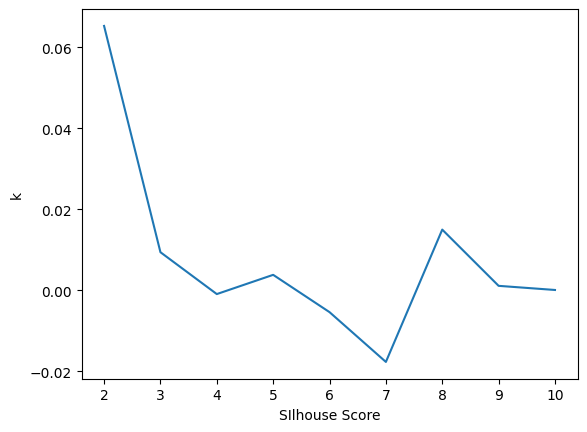

In [34]:
# 실루엣의 시각화
plt.plot(kl, sil)
plt.xlabel('SIlhouse Score')
plt.ylabel('k')
plt.show()